<a href="https://colab.research.google.com/github/nishantsingh311/Assignment3-FeatureEngg/blob/master/Assignment_3_Nishant_singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Df=pd.read_csv("/content/dataset_model.csv")
Df.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [0]:
Df.shape

(614, 13)

In [0]:
Df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
 1 :Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe

In [0]:
Nvb=Df.columns
for i in Nvb:
  if(len(Df[i].unique())==Df.shape[0]):
    print("unique_columns =",i)

unique_columns = Loan_ID


In [0]:
 
new_dataFrame=Df.drop(["Loan_ID"],axis=1)
new_dataFrame.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
new_dataFrame.shape

(614, 12)

In [0]:
 2 Identifying Continous & Categorical Columns

In [0]:
# continous columns
Cont_col = Df._get_numeric_data().columns
Cont_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [0]:
# categorical columns
Cat_col= [i for i in Df if len(Df[i].unique())<=7]
Cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [0]:
 3 Performing Uni-variate Analysis with Plots.Record your Observations

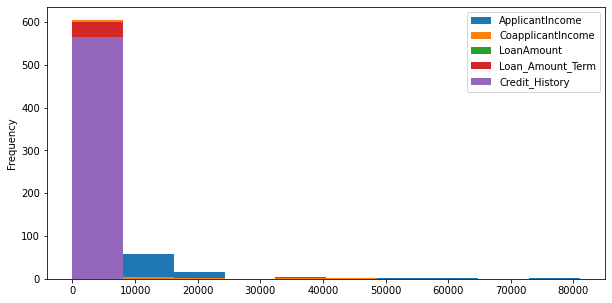

In [0]:
Df.plot.hist(figsize=(10,5))

Text(0.5, 1.0, 'gender')

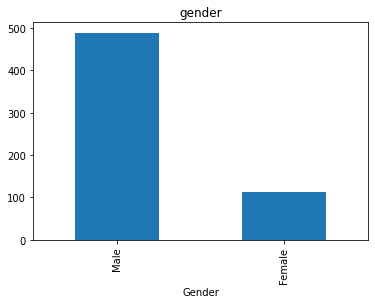

In [0]:
Ct=Df['Gender'].value_counts().plot.bar()
Ct.set_xlabel('Gender')
Ct.set_title('gender')

Text(0.5, 1.0, 'marital status')

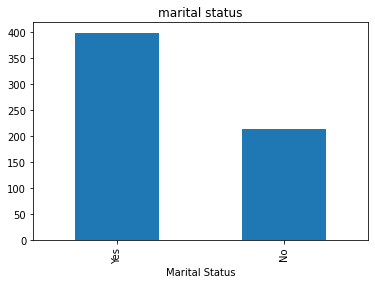

In [0]:
Ct=Df['Married'].value_counts().plot.bar()
Ct.set_xlabel('Marital Status')
Ct.set_title('marital status')

Text(0.5, 0, 'Dependent')

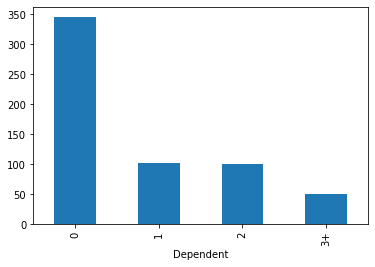

In [0]:
Ct=Df['Dependents'].value_counts().plot.bar()
Ct.set_xlabel("Dependent")

Text(0.5, 0, 'Graudate or Non_Graduate')

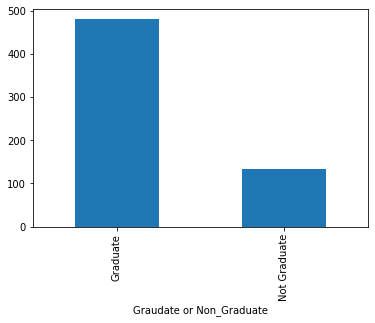

In [0]:
Ct=Df['Education'].value_counts().plot.bar()
Ct.set_xlabel('Graudate or Non_Graduate')

Text(0.5, 0, 'Employment Type')

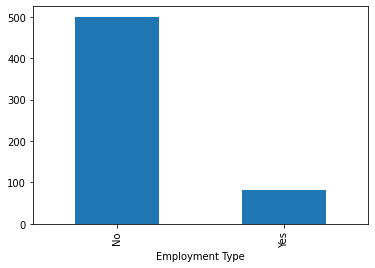

In [0]:
Ct=Df['Self_Employed'].value_counts().plot.bar()
Ct.set_xlabel('Employment Type')

Text(0.5, 0, 'property_area by Applicant')

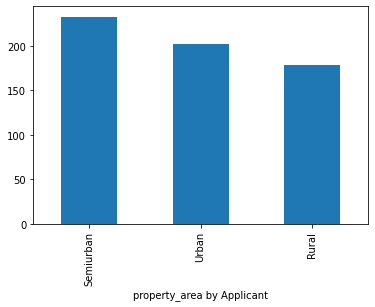

In [0]:
Ct=Df['Property_Area'].value_counts().plot.bar()
Ct.set_xlabel('property_area by Applicant')

In [0]:
 4 Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations

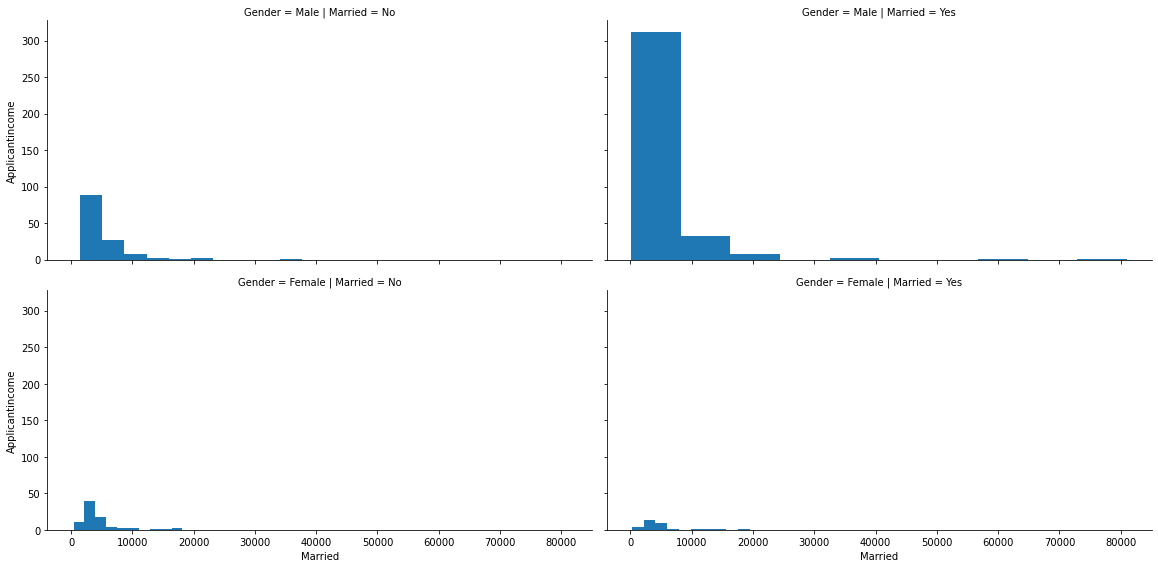

In [0]:
ml= sns.FacetGrid(Df,col='Married',row='Gender',height=4, aspect=2)
ml= ml.map(plt.hist,"ApplicantIncome")
ml.set_xlabels('Married')
ml.set_ylabels('Applicantincome')

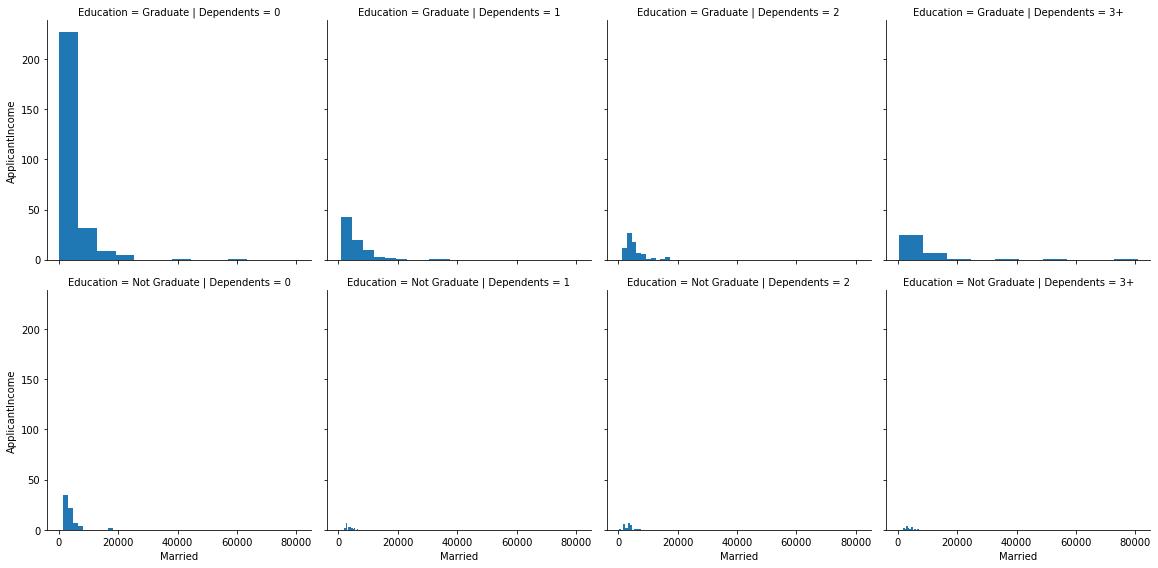

In [0]:
Ml = sns.FacetGrid(Df,col='Dependents',row='Education',height=4, aspect=1)
Ml= Ml.map(plt.hist,"ApplicantIncome")
Ml.set_xlabels('Married')
Ml.set_ylabels('ApplicantIncome')

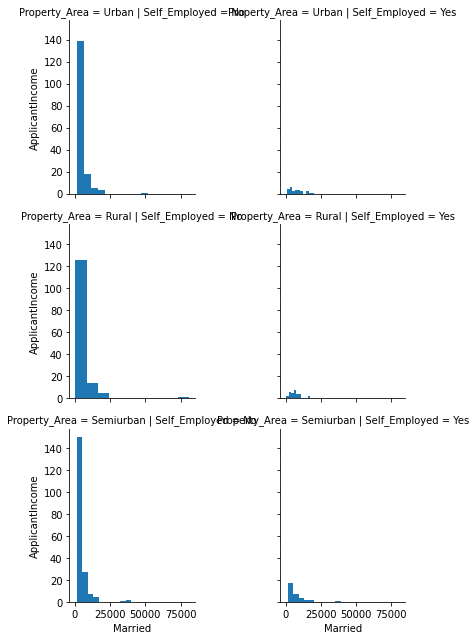

In [0]:
Ml= sns.FacetGrid(Df,col='Self_Employed',row='Property_Area',height=3, aspect=1)
Ml= Ml.map(plt.hist,"ApplicantIncome")
Ml.set_xlabels('Married')
Ml.set_ylabels('ApplicantIncome')

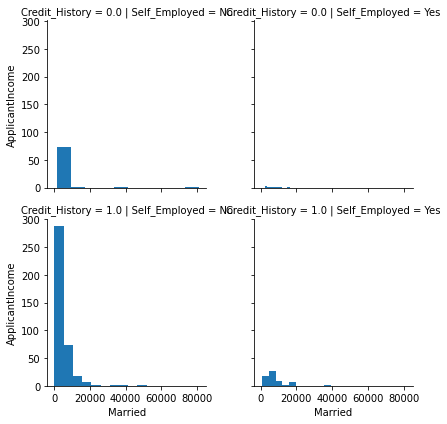

In [0]:
Ml= sns.FacetGrid(Df,col='Self_Employed',row='Credit_History',height=3, aspect=1)
Ml= Ml.map(plt.hist,"ApplicantIncome")
Ml.set_xlabels('Married')
Ml.set_ylabels('ApplicantIncome')

In [0]:
 5 Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc

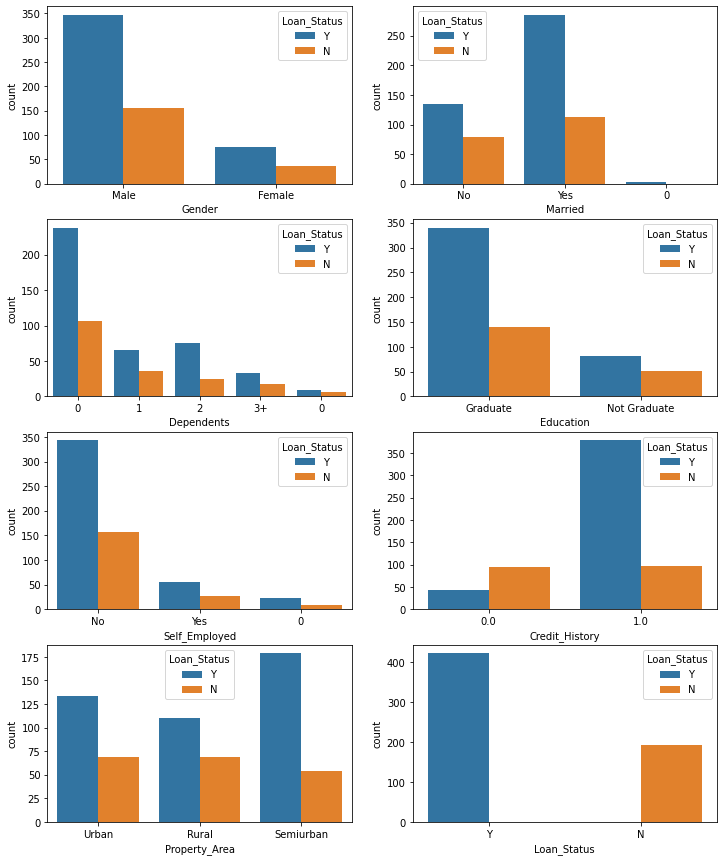

In [0]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for i,cat_col in enumerate(Cat_col):
    row,col = i//2,i%2
    sns.countplot(x=cat_col,data=Df,hue='Loan_Status',ax=axes[row,col])

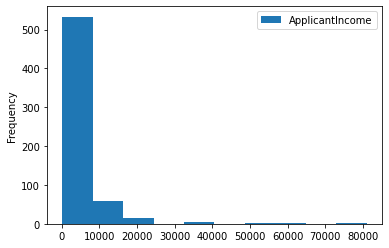

In [0]:
 Df.plot.hist(x='Loan_Status',y='ApplicantIncome')

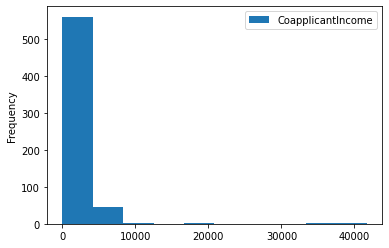

In [0]:
 Df.plot.hist(x='Loan_Status',y='CoapplicantIncome')

In [0]:
 6 How is the class distribution (Y/N) in Label(Target) Variable ?

In [0]:
 Df.groupby('Loan_Status').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,192,187,192,186,192,183,192,192,181,186,179,192
Y,422,414,419,413,422,399,422,422,411,414,385,422


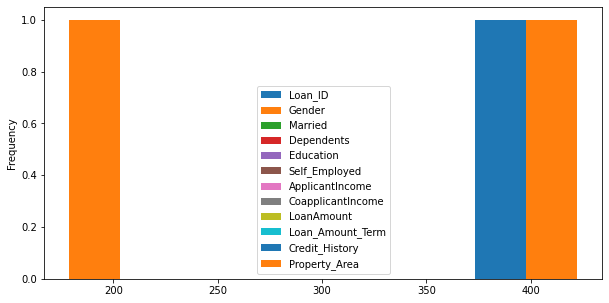

In [0]:
 Df.groupby('Loan_Status').count().plot.hist(figsize=[10,5],fontsize=10)

In [0]:
 7 Identify the Independent Variables that have missing values

In [0]:
 for col in Df.columns:
  missingPercent= np.mean(Df[col].isnull())
  if round(missingPercent*100) >0:
    missingValues= Df[col].isnull().sum().sum()
    print("Column {} mean {} missing values".format(col,int(round(missingPercent*100)),missingValues))

Column Gender mean 2 missing values
Column Dependents mean 2 missing values
Column Self_Employed mean 5 missing values
Column LoanAmount mean 4 missing values
Column Loan_Amount_Term mean 2 missing values
Column Credit_History mean 8 missing values


In [0]:
 8 Handle missing values appropriately , explain the technique applied for each case

In [0]:
Df['Gender']=Df.Gender.fillna(Df["Gender"].value_counts().nlargest(n=1).index[0])
Df= Df.fillna(0)

In [0]:
 for col in Df.columns:
  missingPercent= np.mean(Df[col].isnull())
  if round(missingPercent*100) >0:
    missingValues= Df[col].isnull().sum().sum()
    print("Column {}  mean {} missing values  {}".format(col,int(round(missingPercent*100)),missingValues))
# no missing values found

In [0]:
 9 Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)

In [0]:
Df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [0]:
 10 Use Box-Plot chart to represent the Outliers for each Independent Variable

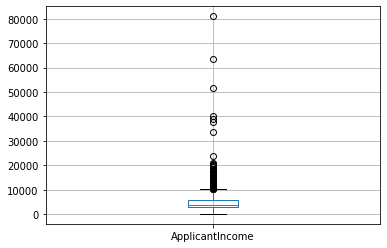

In [0]:
 
Df.boxplot(['ApplicantIncome'])

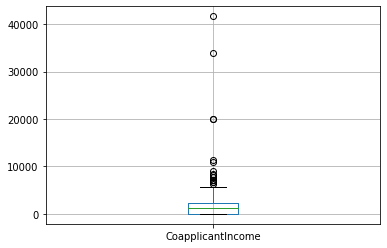

In [0]:
 
Df.boxplot(['CoapplicantIncome'])

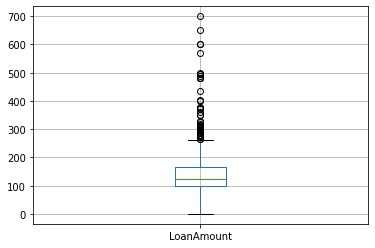

In [0]:
 
Df.boxplot(['LoanAmount'])

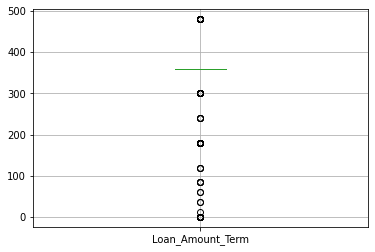

In [0]:
 
Df.boxplot(['Loan_Amount_Term'])

In [0]:
 11 Perform treatment of these Outliers using appropriate techniqies.Explain your approach

In [0]:
 Q1=Df.quantile(0.1)
Q3=Df.quantile(0.9) 
IQR=Q3-Q1
((Df < (Q1 - 1.5 * IQR)) |(Df > (Q3 + 1.5 * IQR))).sum()

ApplicantIncome      10
CoapplicantIncome     6
Credit_History        0
Dependents            0
Education             0
Gender                0
LoanAmount           12
Loan_Amount_Term      0
Loan_ID               0
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [0]:
 f1=Df[~((Df < (Q1 - 1.5 * IQR)) |(Df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [0]:
print(Df.shape)

(614, 13)


In [0]:
print(f1.shape)

(591, 13)


In [0]:
f1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [0]:
 
Step-1
Perform Label Encoding on Target Variable (Loan_Status).

In [0]:
 from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
enc=Df.copy()
enc['Loan_Status'] = le.fit_transform(enc['Loan_Status'])
enc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [0]:
 
Step-2
1 Perform Label Encoding on Categorical Independent Variables.

In [0]:
cat=Cat_col
print(cat)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


In [0]:
enc=Df.copy()
print(cat)
for i in cat:
   print(i)
   enc[i+"_enc"] = le.fit_transform(enc[i])
   enc = enc.drop(i,axis=1)

In [0]:
 2 What is the shape of dataframe post Categorical Encoding ?

In [0]:
 print("After the encoding the shape is : ",enc.shape)

After the encoding the shape is :  (614, 13)


In [0]:
3 Carry out Correlation analysis on this dataframe. Plot using HeatMap

In [0]:
 corr = enc.corr()
corr.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_enc
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,0.006986,0.058809
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,-0.058795,0.082912
LoanAmount,0.538290,0.190377,1.000000,0.058519,-0.032711,0.095586
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,0.050145,-0.049785
Credit_History,0.006986,-0.058795,-0.032711,0.050145,1.000000,0.026655
Gender_enc,0.058809,0.082912,0.095586,-0.049785,0.026655,1.000000


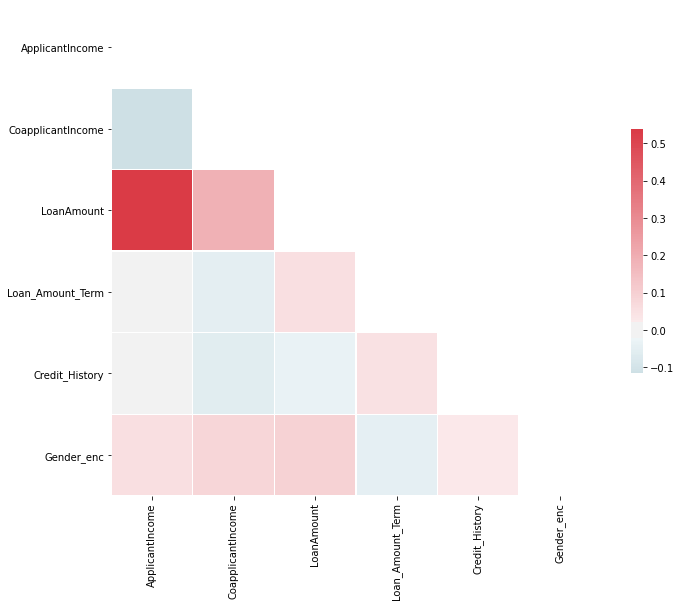

In [0]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

In [0]:
 4 Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)
 
Ans

Loan_Status, LoanAmount,Married Have strong correlation.

In [0]:
 STEP-3
1 Perform One Hot Encoding on Categorical Independent Variables.

In [0]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=Df.copy()
df_ohe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
 df_OHE = Df.copy()
oHE = OneHotEncoder()
 
df_OHE['enc_Loan_Status'] = le.fit_transform(df_OHE['Loan_Status'])
df_OHE = df_OHE.drop(columns=['Loan_Status'])
print(df_OHE)

      Loan_ID  Gender Married  ... Credit_History Property_Area enc_Loan_Status
0    LP001002    Male      No  ...            1.0         Urban               1
1    LP001003    Male     Yes  ...            1.0         Rural               0
2    LP001005    Male     Yes  ...            1.0         Urban               1
3    LP001006    Male     Yes  ...            1.0         Urban               1
4    LP001008    Male      No  ...            1.0         Urban               1
..        ...     ...     ...  ...            ...           ...             ...
609  LP002978  Female      No  ...            1.0         Rural               1
610  LP002979    Male     Yes  ...            1.0         Rural               1
611  LP002983    Male     Yes  ...            1.0         Urban               1
612  LP002984    Male     Yes  ...            1.0         Urban               1
613  LP002990  Female      No  ...            0.0     Semiurban               0

[614 rows x 13 columns]


In [0]:
 oheCorR = df_OHE.corr()
oheCorR

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,enc_Loan_Status
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,0.006986,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,-0.058795,-0.059187
LoanAmount,0.538290,0.190377,1.000000,0.058519,-0.032711,-0.010631
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,0.050145,0.007306
Credit_History,0.006986,-0.058795,-0.032711,0.050145,1.000000,0.432616
enc_Loan_Status,-0.004710,-0.059187,-0.010631,0.007306,0.432616,1.000000


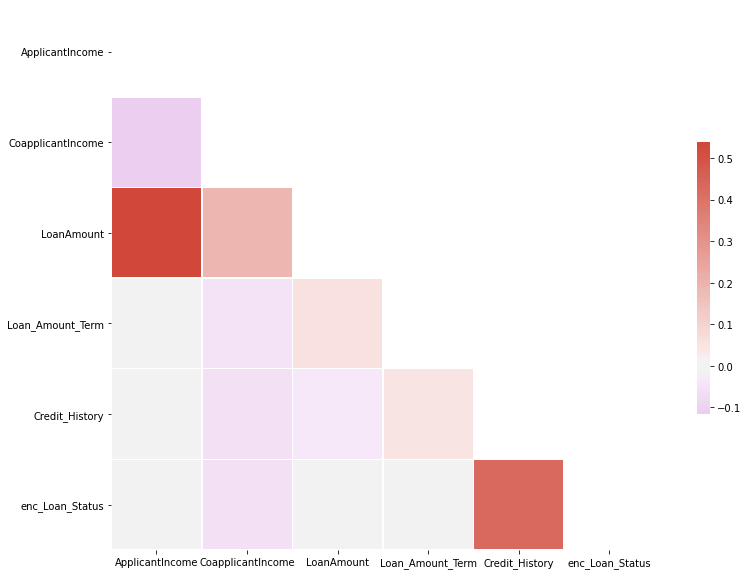

In [0]:
mask = np.zeros_like(oheCorR, dtype=bool)
mask[np.triu_indices_from(mask)] = True
 
f, ax = plt.subplots(figsize=(15, 10))
 
cmap = sns.diverging_palette(300, 15, as_cmap=True)
 
svm = sns.heatmap(oheCorR, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()